In [1]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the dataset


df= pd.read_csv(r"C:\Users\user\Downloads\Preprocessed Primary Edu.csv")
df.head()

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,98,SDG: Central and Southern Asia,Kazakhstan,2012,female,99.8,46.379381,6.361501,108.19,73.7825,19.25,3.90
1,99,SDG: Central and Southern Asia,Kazakhstan,2012,male,99.7,46.379381,6.361501,106.88,73.7825,19.25,3.90
2,100,SDG: Central and Southern Asia,Kazakhstan,2013,female,99.9,46.379381,6.361501,109.76,73.7825,17.96,3.44
3,101,SDG: Central and Southern Asia,Kazakhstan,2013,male,99.8,46.379381,6.361501,108.90,73.7825,17.96,3.44
4,102,SDG: Central and Southern Asia,Kazakhstan,2014,female,99.9,36.650000,0.000000,115.17,73.7825,17.32,3.42


In [3]:
#To check for each columns

df.info()

# Noticed that the year data is stored as integer so converted it to date data type
df['Year'] = pd.to_datetime(df['Year'], inplace = True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 12 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Unnamed: 0                                                                    1698 non-null   int64  
 1   Region                                                                        1698 non-null   object 
 2   Country                                                                       1698 non-null   object 
 3   Year                                                                          1698 non-null   int64  
 4   Gender                                                                        1698 non-null   object 
 5   Completion Rate for Primary Edu                                               1698 non-null   float64
 6   Childhood Education GER         

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [5]:
# statistics of of each column 


df.describe()

,Unnamed: 0,Year,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,2361.856890,2015.964664,79.982038,46.379381,6.361501,88.929355,76.041811,15.022456,4.163666
std,1335.305166,2.646072,21.729718,22.857787,14.199894,14.404606,11.537998,4.107283,1.644273
min,98.000000,2012.000000,22.680000,0.720000,0.000000,26.270000,8.640000,2.200000,0.000000
25%,1306.250000,2014.000000,64.932500,35.097500,0.000000,88.929355,73.782500,12.750000,3.150000
50%,2249.500000,2016.000000,90.280000,46.379381,0.000000,88.929355,73.782500,15.022456,4.163666
75%,3671.750000,2018.000000,98.147500,50.455000,6.361501,98.607500,73.782500,16.800000,4.760000
max,4394.000000,2021.000000,100.000000,160.860000,93.540000,123.210000,100.000000,37.520000,13.600000


In [4]:
# just to be sure no null values

df.isnull().sum()

Unnamed: 0                                                                      0
Region                                                                          0
Country                                                                         0
Year                                                                            0
Gender                                                                          0
Completion Rate for Primary Edu                                                 0
Childhood Education GER                                                         0
Gross enrolment ratio, early childhood educational development programmes,      0
Gross intake ratio to the last grade of primary education,                      0
Literacy rate for 25-64 years old                                               0
Expenditure on education as a percentage of total government expenditure (%)    0
Government expenditure on education as a percentage of GDP (%)                  0
dtype: int64

In [6]:
df.shape

(1698, 12)

In [7]:
# check for duplicates
df.duplicated().sum()

0

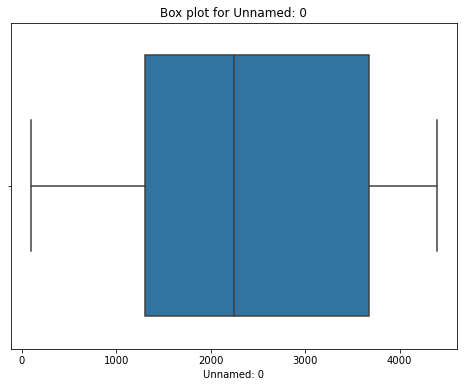

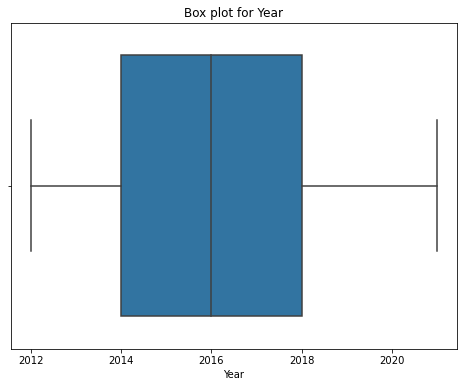

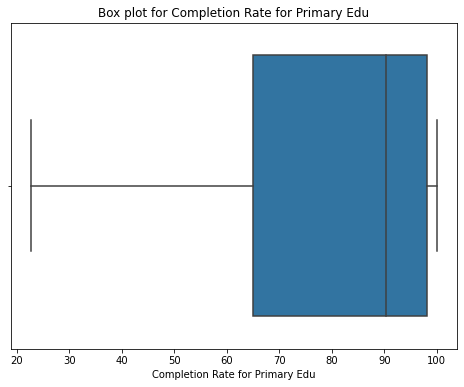

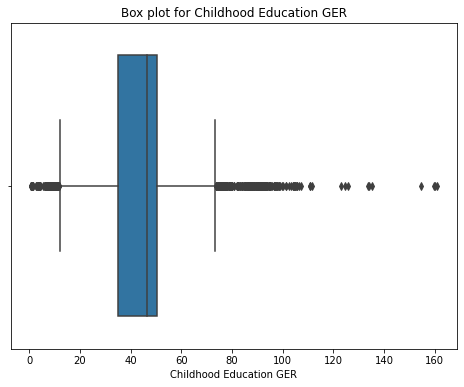

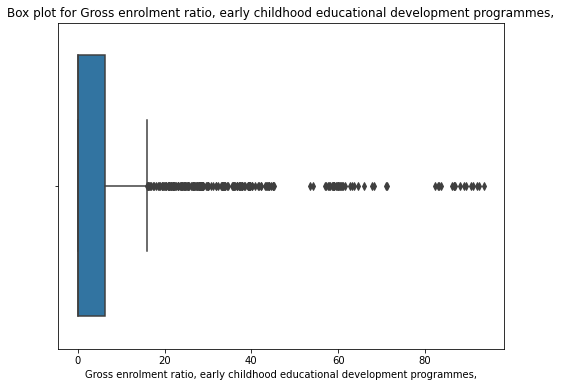

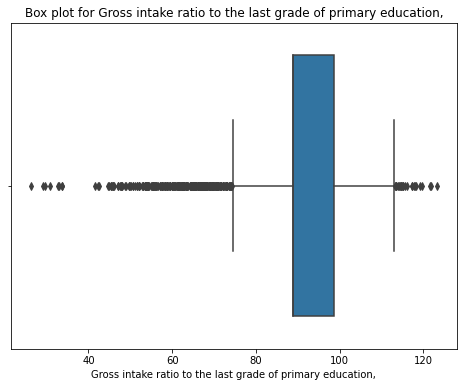

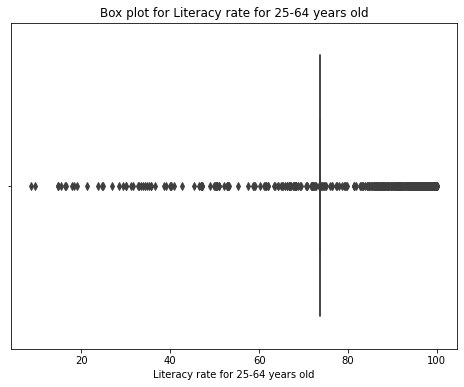

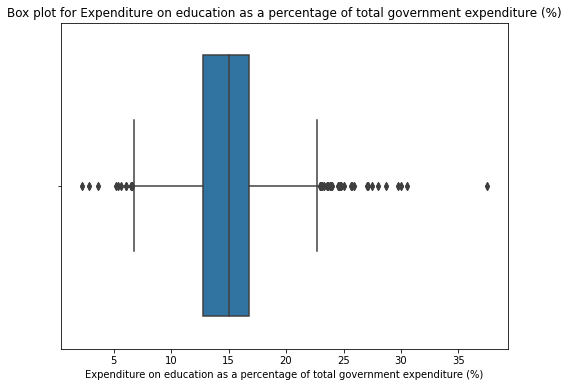

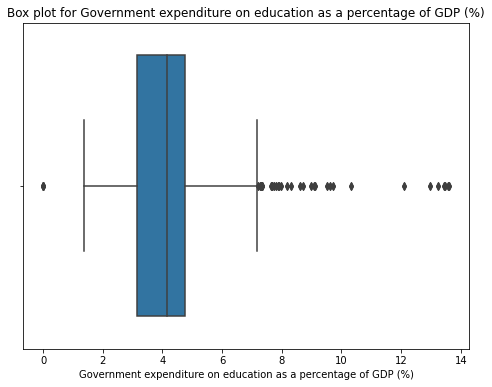

In [8]:
# checking for any outliers

import seaborn as sns

for column in df.columns:
    if df[column].dtype != 'object' and df[column].dtype !='datetime64[ns]':
        plt.figure(figsize =(8,6))
        sns.boxplot(x = df[column])
        plt.title(f"Box plot for {column}")
        plt.show()
        
# from the output below, our dependent variable has no outlier 
# for other columns with outlier, we decide to handle the outliers seperaely by grouping them and treating as different column
# or transformation like getting the sqaure root or log-transform can be done to normalize the data and reduce the impact of the outliers
 # we can also leave it just so we don't reduce the data integrity       

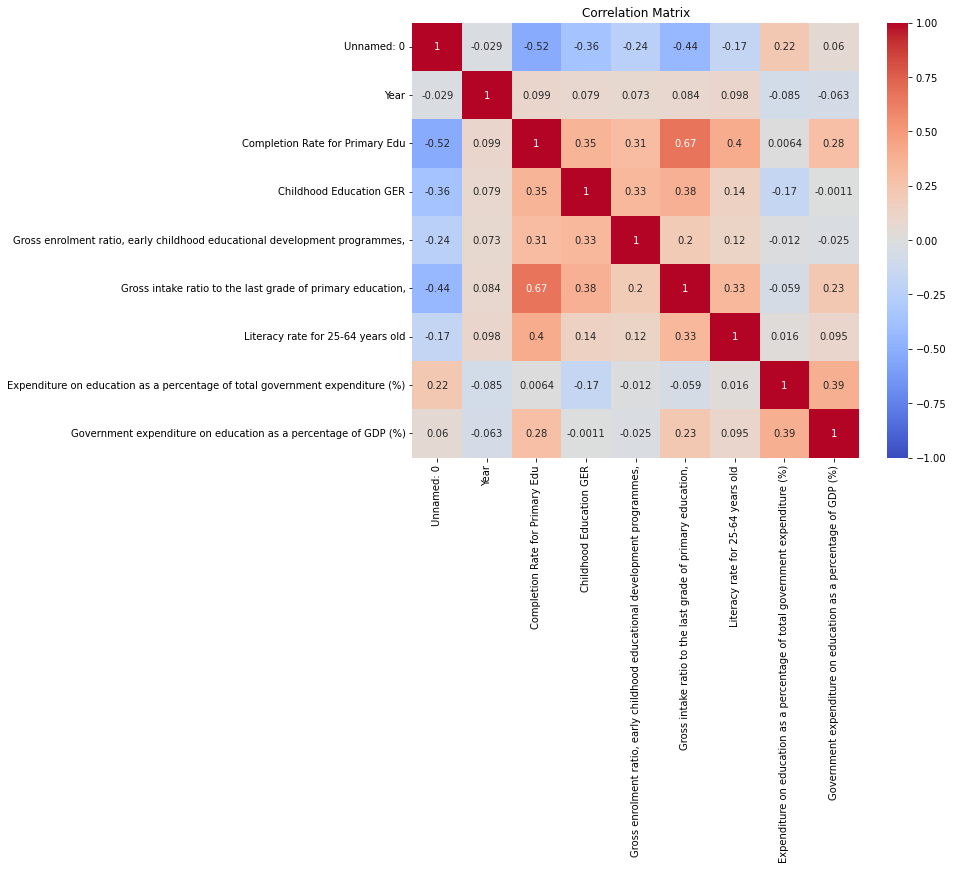

In [9]:
# create heatmap and show the correlation between the variable

corr_matrix = df.corr()
features = df.columns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

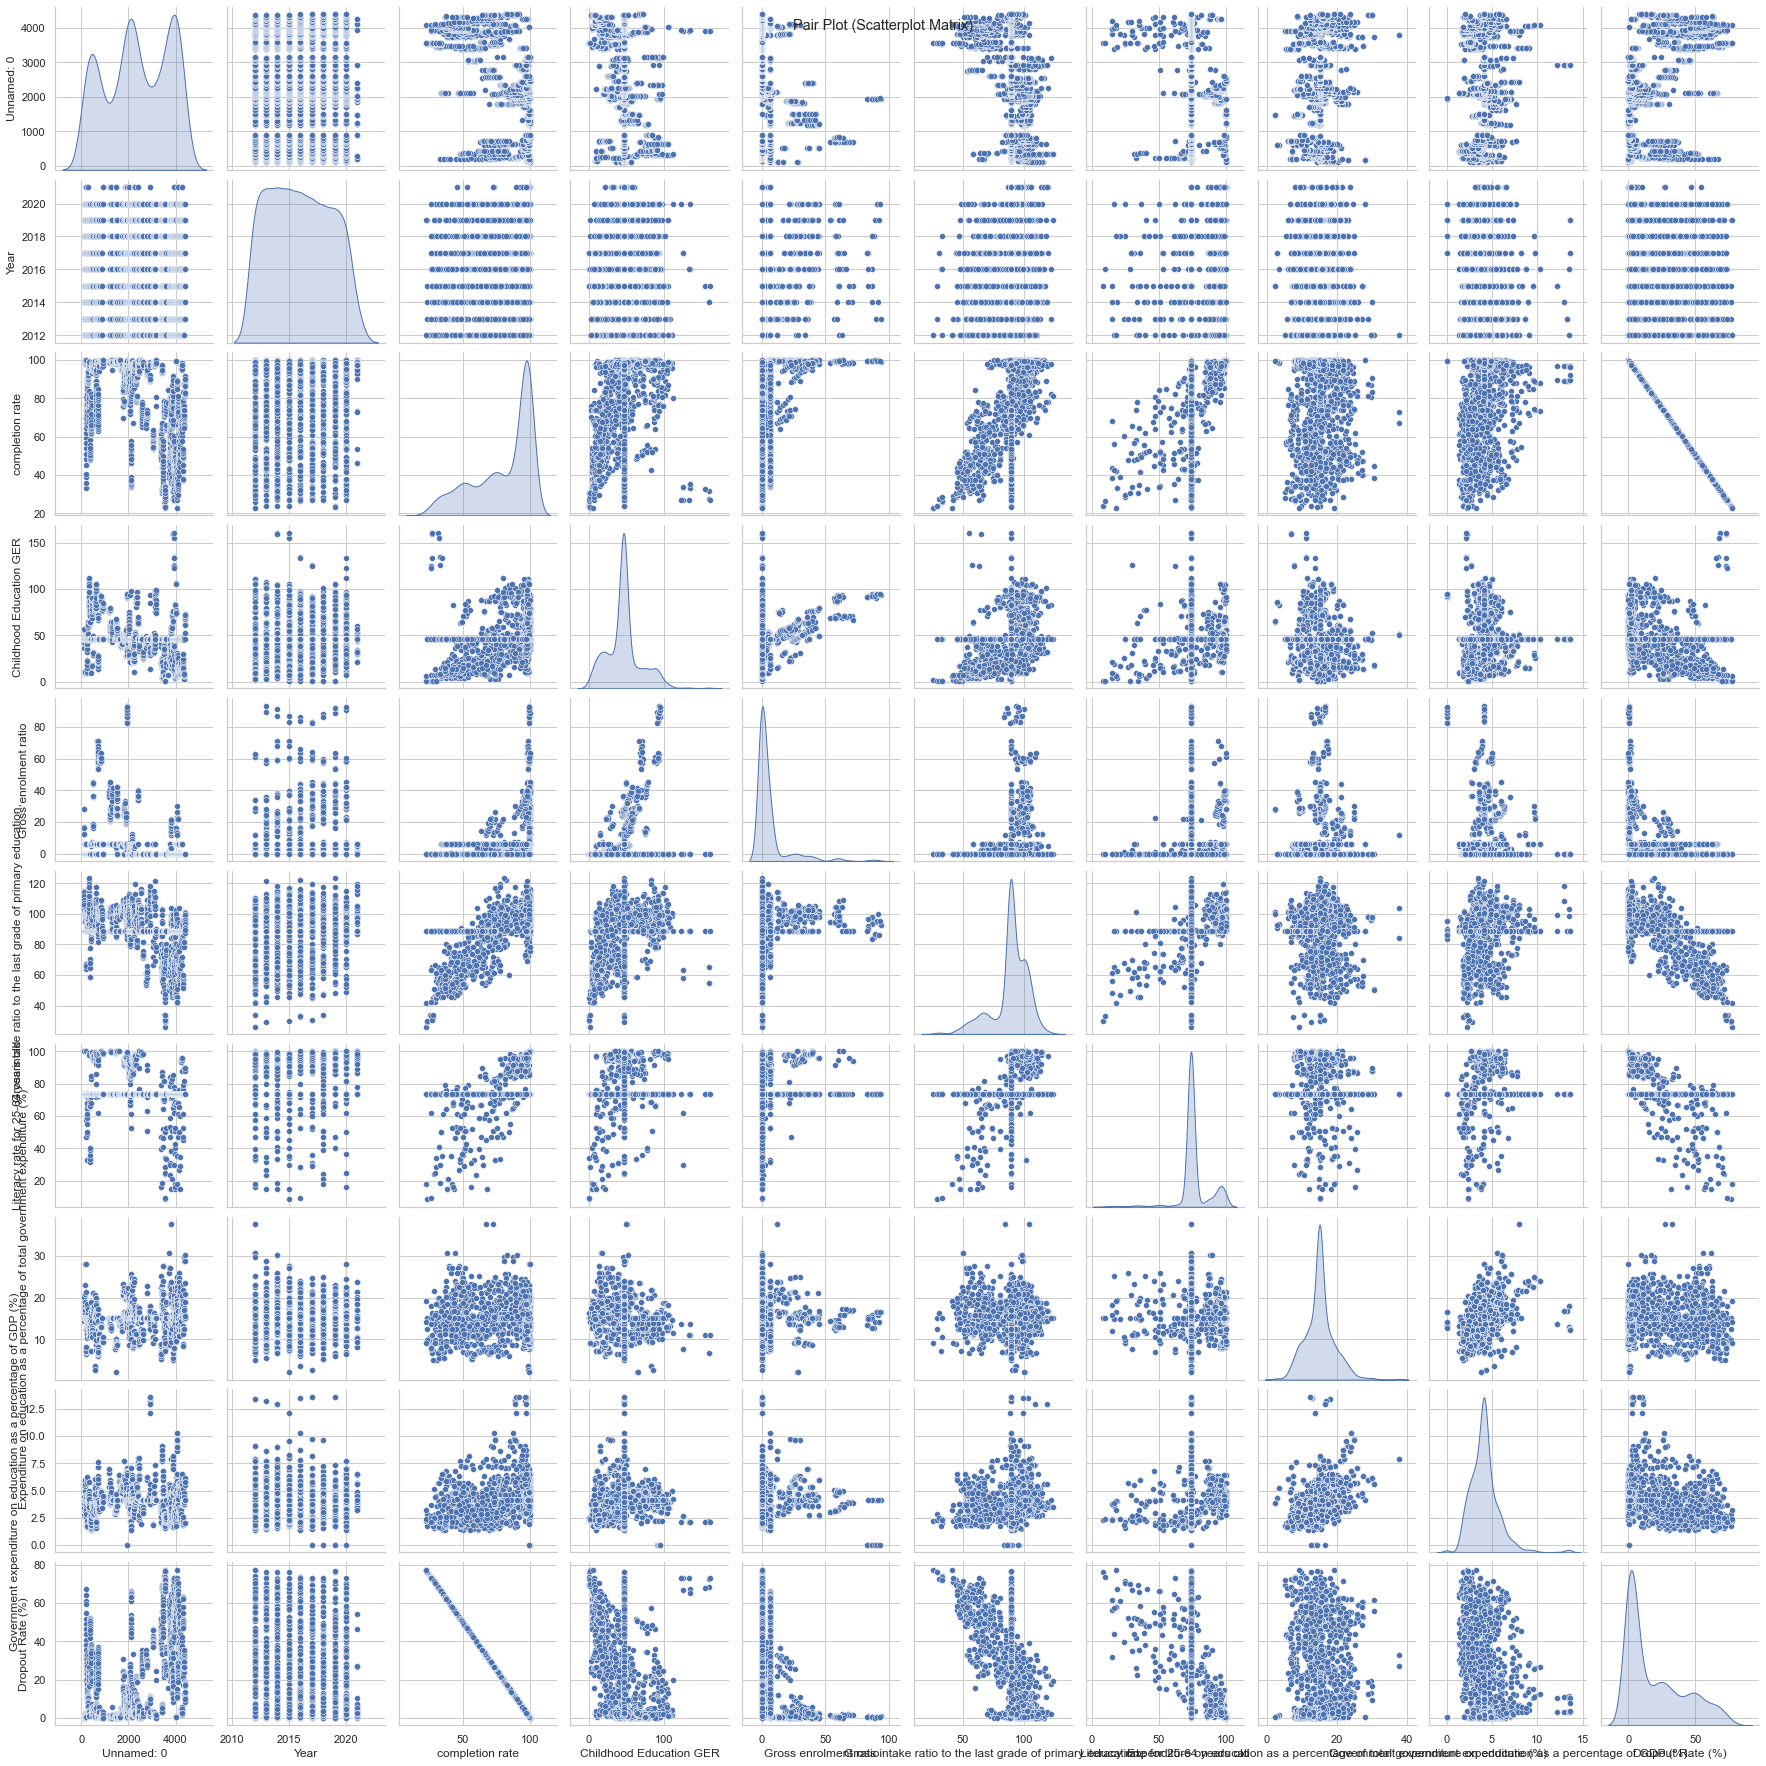

In [55]:
# Distribution of the data

sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot (Scatterplot Matrix)')
plt.show()

In [10]:
# Rename the 'old_column_name' to 'new_column_name'
df.rename(columns={'Completion Rate for Primary Edu': 'completion rate'}, inplace=True)








In [11]:
# Checking for the average students school completion rate by gender


# Calculate completion rates by gender
completion_rate_by_gender = df.groupby('Gender')['completion rate'].mean()

# Display completion rates
print(completion_rate_by_gender)

Gender
female    81.188963
male      78.775112
Name: completion rate, dtype: float64


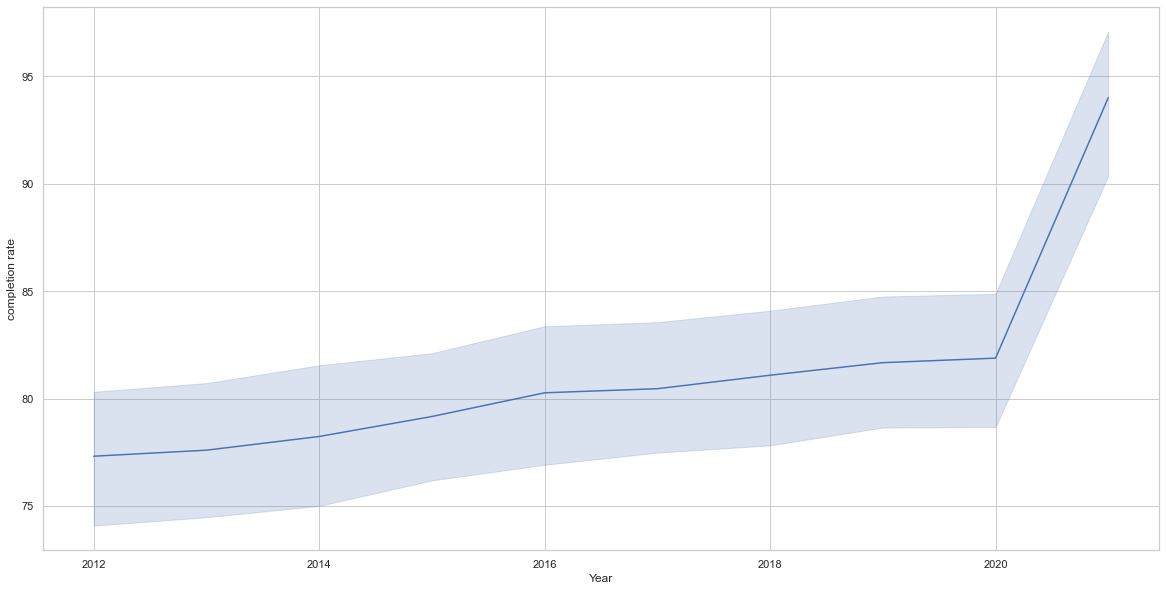

In [12]:
# Create a line plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='completion rate', data=df)
plt.show()

In [13]:
# Calculate the Dropout Rate and add it as a new column
df["Dropout Rate (%)"] = 100 - df["completion rate"]


In [14]:
# To get the top five countries with the highest completion rate


# Group by countries and calculate the average completion rate
average_completion_by_country = df.groupby("Country")["completion rate"].mean()

# Sort the grouped data in descending order and get the top five countries
Top_countries = average_completion_by_country.sort_values(ascending=False).head(5)



print(Top_countries)

Country
Latvia          99.850500
Kazakhstan      99.841667
Lithuania       99.827500
Armenia         99.736111
Turkmenistan    99.712778
Name: completion rate, dtype: float64


In [15]:
# To get the five countries with the least completion rate


# Group by countries and calculate the average completion rate
average_completion_by_country = df.groupby("Country")["completion rate"].mean()

# Sort the grouped data in descending order and get the top five countries
Bottom_countries = average_completion_by_country.sort_values(ascending=True).head(5)

print(Bottom_countries)

# From the output below chad is the country with least stundents completion rate, therefore the drop out rate is very high totalling 71%

Country
Chad                        28.022222
Central African Republic    30.420000
Liberia                     30.572222
Burkina Faso                32.400000
Niger                       33.385833
Name: completion rate, dtype: float64


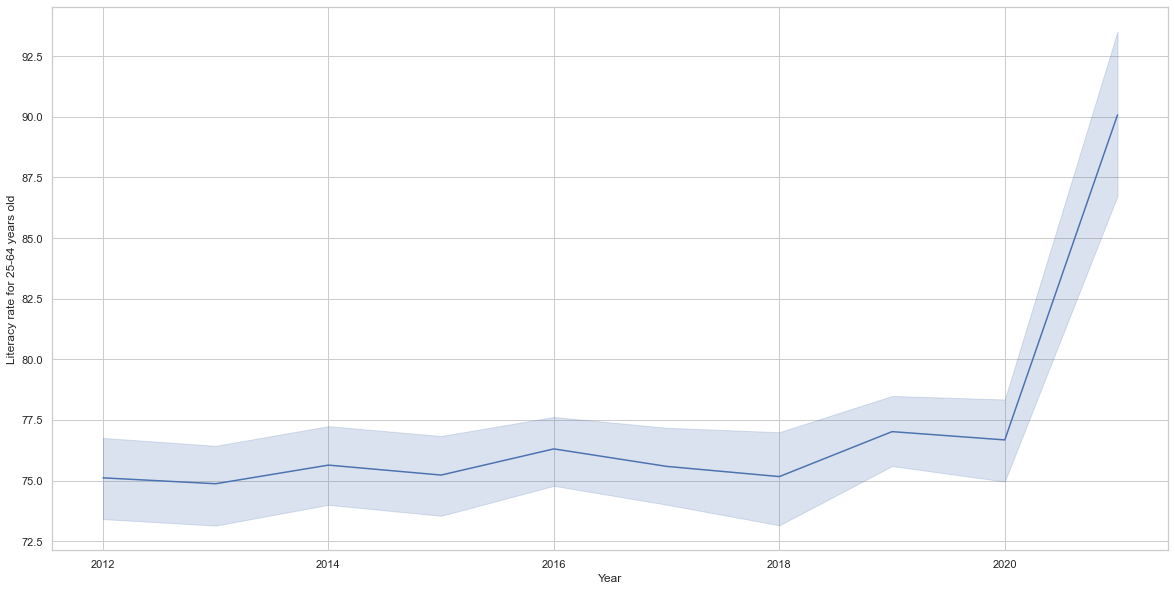

In [16]:
# Create a line plot using Seaborn for the literacy rate over the years
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Literacy rate for 25-64 years old', data=df)
plt.show()

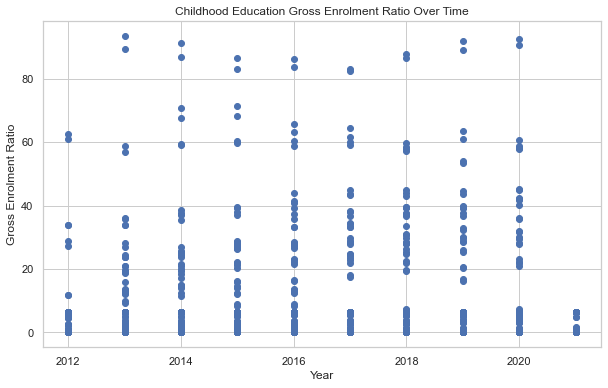

In [27]:
# Are there any noticeable trends in childhood education gross enrolment ratio over time?

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df[ 'Gross enrolment ratio, early childhood educational development programmes,'], marker='o')
plt.title('Childhood Education Gross Enrolment Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Gross Enrolment Ratio')
plt.grid(True)
plt.show()

# for the output below, we noticed 2013,has an increased early childhood enrolment programs for students follow by 2019 and 2020.

In [47]:
# Rename the 'old_column_name' to 'new_column_name'
df.rename(columns={'Gross enrolment ratio, early childhood educational development programmes,': 'Gross enrolment ratio'}, inplace=True)


# Is there any notable variation in childhood education gross enrolment ratios based on gender?

plt.figure(figsize=(10, 6))
sns.lineplot(x='Gender', y='Gross enrolment ratio')
plt.title('Variation in Childhood Education Gross Enrolment Ratios Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Gross Enrolment Ratio')
plt.show()


ValueError: Could not interpret value `Gender` for parameter `x`

<Figure size 720x432 with 0 Axes>

In [42]:
# Which countries show the highest literacy rates for individuals aged 25-64?

# Group by countries and calculate the average completion rate
average_literacy_by_country = df.groupby("Country")["Literacy rate for 25-64 years old"].mean()

# Sort the grouped data in descending order and get the top five countries
Top_countries = average_literacy_by_country.sort_values(ascending=False).head(5)

Top_countries

Country
Uzbekistan    100.00000
Uruguay        96.30975
Colombia       95.40150
Paraguay       95.32550
Peru           94.16300
Name: Literacy rate for 25-64 years old, dtype: float64

In [43]:
# Which countries show the lowest literacy rates for individuals aged 25-64?

# Group by countries and calculate the average completion rate
average_literacy_by_country = df.groupby("Country")["Literacy rate for 25-64 years old"].mean()

# Sort the grouped data in descending order and get the top five countries
countries by lowest literacy rate = average_literacy_by_country.sort_values(ascending=True).head(5)

countries by lowest literacy rate

Country
Mali            58.585556
Pakistan        58.708611
Chad            61.881944
Burkina Faso    62.809375
Bangladesh      63.146111
Name: Literacy rate for 25-64 years old, dtype: float64

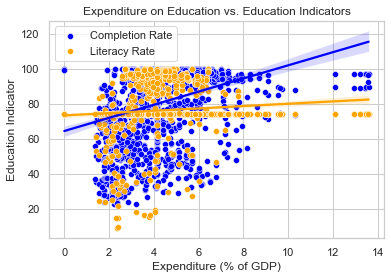

In [45]:
# How does expenditure on education as a percentage of GDP relate to other education indicators?

#Scatter plots
sns.scatterplot(x='Government expenditure on education as a percentage of GDP (%)', y='completion rate', data=df, color='blue', label='Completion Rate')
sns.scatterplot(x='Government expenditure on education as a percentage of GDP (%)', y='Literacy rate for 25-64 years old', data=df, color='orange', label='Literacy Rate')
# Add more scatter plots for other indicators

# Regression lines
sns.regplot(x='Government expenditure on education as a percentage of GDP (%)', y='completion rate', data=df, scatter=False, color='blue')
sns.regplot(x='Government expenditure on education as a percentage of GDP (%)', y='Literacy rate for 25-64 years old', data=df, scatter=False, color='orange')
# Add more regression lines for other indicators

plt.title('Expenditure on Education vs. Education Indicators')
plt.xlabel('Expenditure (% of GDP)')
plt.ylabel('Education Indicator')
plt.legend()
plt.grid(True)
plt.show()

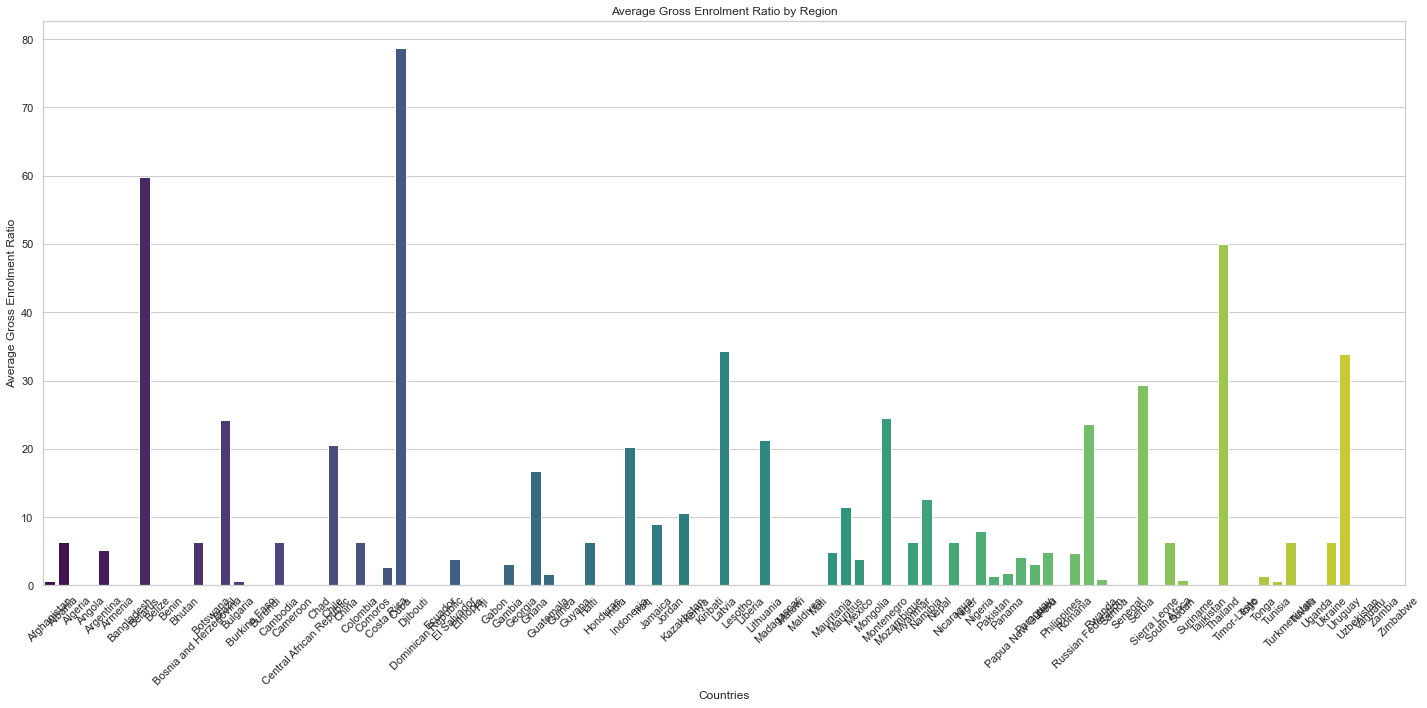

In [50]:
#How do different regions or countries compare in terms of "Gross enrolment ratio, early childhood educational development programmes"? Are there regions with consistently higher or lower enrolment ratios?

#Group data by Region or Country and calculate the mean enrolment ratio
grouped = df.groupby('Country')['Gross enrolment ratio'].mean()

# Create a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Gross Enrolment Ratio by country')
plt.xlabel('Countries')
plt.ylabel('Average Gross Enrolment Ratio')
plt.tight_layout()

plt.show()

In [53]:
# Group by countries and calculate the average completion rate
average_literacy_by_country = df.groupby("Country")["Gross enrolment ratio"].mean()

# Sort the grouped data in descending order and get the top five countries
countries = average_literacy_by_country.sort_values(ascending=False).head(5)

countries

Country
Cuba        78.752389
Belarus     59.805000
Thailand    49.985333
Latvia      34.386800
Uruguay     33.948650
Name: Gross enrolment ratio, dtype: float64